In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-competition-sharif/sample_submission.csv
/kaggle/input/test-competition-sharif/train.csv
/kaggle/input/test-competition-sharif/test.csv


In [2]:
import pandas as pd

# read data

In [3]:
train_dataset=pd.read_csv("/kaggle/input/test-competition-sharif/train.csv")
test_dataset=pd.read_csv("/kaggle/input/test-competition-sharif/test.csv")

In [5]:
train_dataset.__class__

pandas.core.frame.DataFrame

In [7]:
train_dataset.tail(5)

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
37132,37132,3.3438,50.0,4.936508,1.079365,1775.0,3.022222,34.19,-118.36,1.856
37133,37133,3.7308,26.0,5.087533,0.966019,1006.0,4.316901,37.32,-121.86,1.588
37134,37134,4.1716,52.0,4.678862,1.101485,1156.0,1.431734,37.75,-122.44,3.387
37135,37135,2.7143,16.0,5.710074,1.068376,584.0,2.803659,38.40,-120.98,1.592
37136,37136,2.2419,34.0,5.424419,1.058685,1340.0,3.799065,36.34,-119.64,0.652


## select row: iloc

In [10]:
train_dataset.iloc[5]

id                5.000000
MedInc            6.807500
HouseAge         26.000000
AveRooms          6.764372
AveBedrms         1.091787
Population     2147.000000
AveOccup          2.703540
Latitude         33.840000
Longitude      -118.310000
MedHouseVal       3.714000
Name: 5, dtype: float64

## column by name

In [13]:
train_dataset["AveBedrms"]

0        1.112100
1        1.054217
2        1.103175
3        0.965432
4        1.069246
           ...   
37132    1.079365
37133    0.966019
37134    1.101485
37135    1.068376
37136    1.058685
Name: AveBedrms, Length: 37137, dtype: float64

## iloc select row & column

In [15]:
train_dataset.iloc[5, [1,2,3,0]]

MedInc       6.807500
HouseAge    26.000000
AveRooms     6.764372
id           5.000000
Name: 5, dtype: float64

# mathplotlib

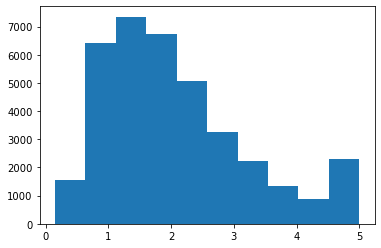

In [17]:
import matplotlib.pyplot as plt

plt.hist(train_dataset['MedHouseVal'], bins=10)
plt.show()

## House Age Vs Value

In [18]:
AgeVsVal=train_dataset[["HouseAge","MedHouseVal"]]

In [19]:
AgeVsVal

,HouseAge,MedHouseVal
0,15.0,0.980
1,17.0,0.946
2,27.0,1.576
3,16.0,1.336
4,52.0,4.500
...,...,...
37132,50.0,1.856
37133,26.0,1.588
37134,52.0,3.387
37135,16.0,1.592


In [20]:
df=AgeVsVal.loc[AgeVsVal['HouseAge']==10]
df

,HouseAge,MedHouseVal
15,10.0,2.250
28,10.0,0.960
106,10.0,0.844
112,10.0,2.810
250,10.0,4.650
...,...,...
36896,10.0,1.962
36928,10.0,2.014
37000,10.0,1.656
37002,10.0,2.268


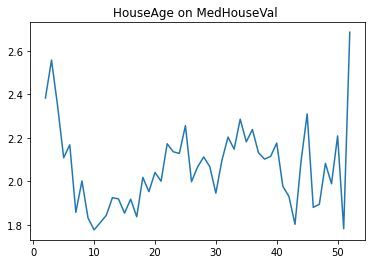

In [22]:
mean_val=[]
age=[]
for i in range(1000):
    df=AgeVsVal.loc[AgeVsVal['HouseAge']==i]
    if len(df)>0:
        age.append(i)
        mean_val.append(df['MedHouseVal'].mean())
plt.plot(age, mean_val)
plt.title("HouseAge on MedHouseVal ")
plt.show()

# numpy

In [23]:
import numpy as np

In [24]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print(type(a), a.shape, a[0], a[1], a[2])
a[0] = 5   # Change an element of the array
print(a)   

<class 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]


In [27]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b)

[[1 2 3]
 [4 5 6]]


In [29]:
print(b.shape)
print(b[0, 0], b[0, 1], b[1, 0])

(2, 3)
1 2 4


Numpy also provides many functions to create arrays:

In [31]:
a = np.zeros((5,5))  # Create an array of all zeros
print(a)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [32]:
b = np.ones((1,2))   # Create an array of all ones
print(b)

[[1. 1.]]


In [33]:
d = np.eye(2)        # Create a 2x2 identity matrix
print(d)

[[1. 0.]
 [0. 1.]]


In [36]:
e = np.random.random((10,10)) # Create an array filled with random values
print(e)

[[0.94669093 0.20868013 0.7363825  0.52438572 0.61295244 0.14291114
  0.69325476 0.59993472 0.91474671 0.25985152]
 [0.41533667 0.5780531  0.72486836 0.97250359 0.31059554 0.33362687
  0.89476719 0.01631829 0.24476526 0.43813289]
 [0.33233382 0.22247448 0.09252432 0.41026073 0.09384021 0.79058251
  0.63786292 0.29765635 0.73164522 0.76995753]
 [0.6805137  0.90027058 0.21077924 0.8179058  0.58888005 0.99963512
  0.16435381 0.90694454 0.27314365 0.74127251]
 [0.3572921  0.74203573 0.49287687 0.05723334 0.28779998 0.2770642
  0.84787625 0.2532986  0.42019777 0.46728448]
 [0.36720442 0.1708868  0.97364754 0.88300586 0.56003043 0.55349298
  0.45543741 0.683801   0.01231859 0.42910965]
 [0.8937455  0.36133013 0.80145928 0.43239886 0.09614045 0.29618229
  0.33911548 0.31628752 0.1195666  0.99820719]
 [0.33303782 0.76921315 0.52619624 0.69444027 0.65831216 0.16349068
  0.75493491 0.01130137 0.60704615 0.25250482]
 [0.59247151 0.02000014 0.67428593 0.62820582 0.06102062 0.07614307
  0.63447598 

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:


In [67]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

print(a)
# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:]
print(b)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[2 3 4]
 [6 7 8]]


In [68]:
b=np.array([[1,2],[3,4]])
print(a)
a[1:3,1:3]*=2
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[ 1  2  3  4]
 [ 5 12 14  8]
 [ 9 20 22 12]]


In [42]:
a*2

array([[ 2,  4,  6,  8],
       [10, 12, 14, 16],
       [18, 20, 22, 24]])

In [43]:
a*a

array([[  1,   4,   9,  16],
       [ 25,  36,  49,  64],
       [ 81, 100, 121, 144]])

In [44]:
np.mean(a)

6.5

In [45]:
np.sum(a)

78

In [46]:
np.matmul(a,a.transpose())

array([[ 30,  70, 110],
       [ 70, 174, 278],
       [110, 278, 446]])

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [51]:
a.reshape(2,-1)

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

# numpy <-> padnas

In [52]:
train_dataset

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500
...,...,...,...,...,...,...,...,...,...,...
37132,37132,3.3438,50.0,4.936508,1.079365,1775.0,3.022222,34.19,-118.36,1.856
37133,37133,3.7308,26.0,5.087533,0.966019,1006.0,4.316901,37.32,-121.86,1.588
37134,37134,4.1716,52.0,4.678862,1.101485,1156.0,1.431734,37.75,-122.44,3.387
37135,37135,2.7143,16.0,5.710074,1.068376,584.0,2.803659,38.40,-120.98,1.592


In [54]:
train_dataset['MedHouseVal'].mean()

2.079751250235614

In [57]:
ans_dataset=test_dataset[['id']]
ans_dataset['MedHouseVal']=np.ones(len(ans_dataset))*2.07975

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
ans_dataset.head(5)

,id,MedHouseVal
0,37137,2.07975
1,37138,2.07975
2,37139,2.07975
3,37140,2.07975
4,37141,2.07975


In [59]:
ans_dataset.to_csv("/kaggle/working/dummy.csv")
ans_dataset.to_csv("/kaggle/working/dummy2.csv", index=False)